In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2

D:\ProgramData\Anaconda3\lib\site-packages\pycocotools\coco.py:49: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\ProgramData\An

In [2]:
image_directory = './'
annotation_file = 'new2_instances_train2014.json'

In [3]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

Custom COCO supercategories: 
vehicle furniture kitchen electronic appliance food sports accessory indoor person outdoor animal


In [5]:
category_ids = example_coco.getCatIds(catNms=['book','knife'])
image_ids = example_coco.getImgIds(catIds=category_ids)
#image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]
image_data = example_coco.loadImgs(image_ids[0])

In [6]:
image_ids

[89]

In [7]:
image_data

[{'license': 4,
  'file_name': 'COCO_train2014_000000000089.jpg',
  'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000000089.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-24 10:30:12',
  'flickr_url': 'http://farm5.staticflickr.com/4062/4530436084_7d7d39892d_z.jpg',
  'id': 89}]

In [8]:
imgPath = image_data[0]['file_name']

[502.6, 105.47, 528.4300000000001, 105.47, 528.4300000000001, 237.85, 502.6, 237.85]
[476.62, 127.49, 496.34000000000003, 127.49, 496.34000000000003, 233.6, 476.62, 233.6]
[528.8, 99.3, 555.27, 99.3, 555.27, 237.19, 528.8, 237.19]
[555.67, 100.9, 576.54, 100.9, 576.54, 239.88, 555.67, 239.88]
[573.73, 96.6, 600.7, 96.6, 600.7, 239.39, 573.73, 239.39]
[476.68, 333.95, 567.13, 333.95, 567.13, 364.31, 476.68, 364.31]
[497.16, 365.19, 611.21, 365.19, 611.21, 398.89, 497.16, 398.89]
[513.13, 402.71, 640.0, 402.71, 640.0, 452.83, 513.13, 452.83]


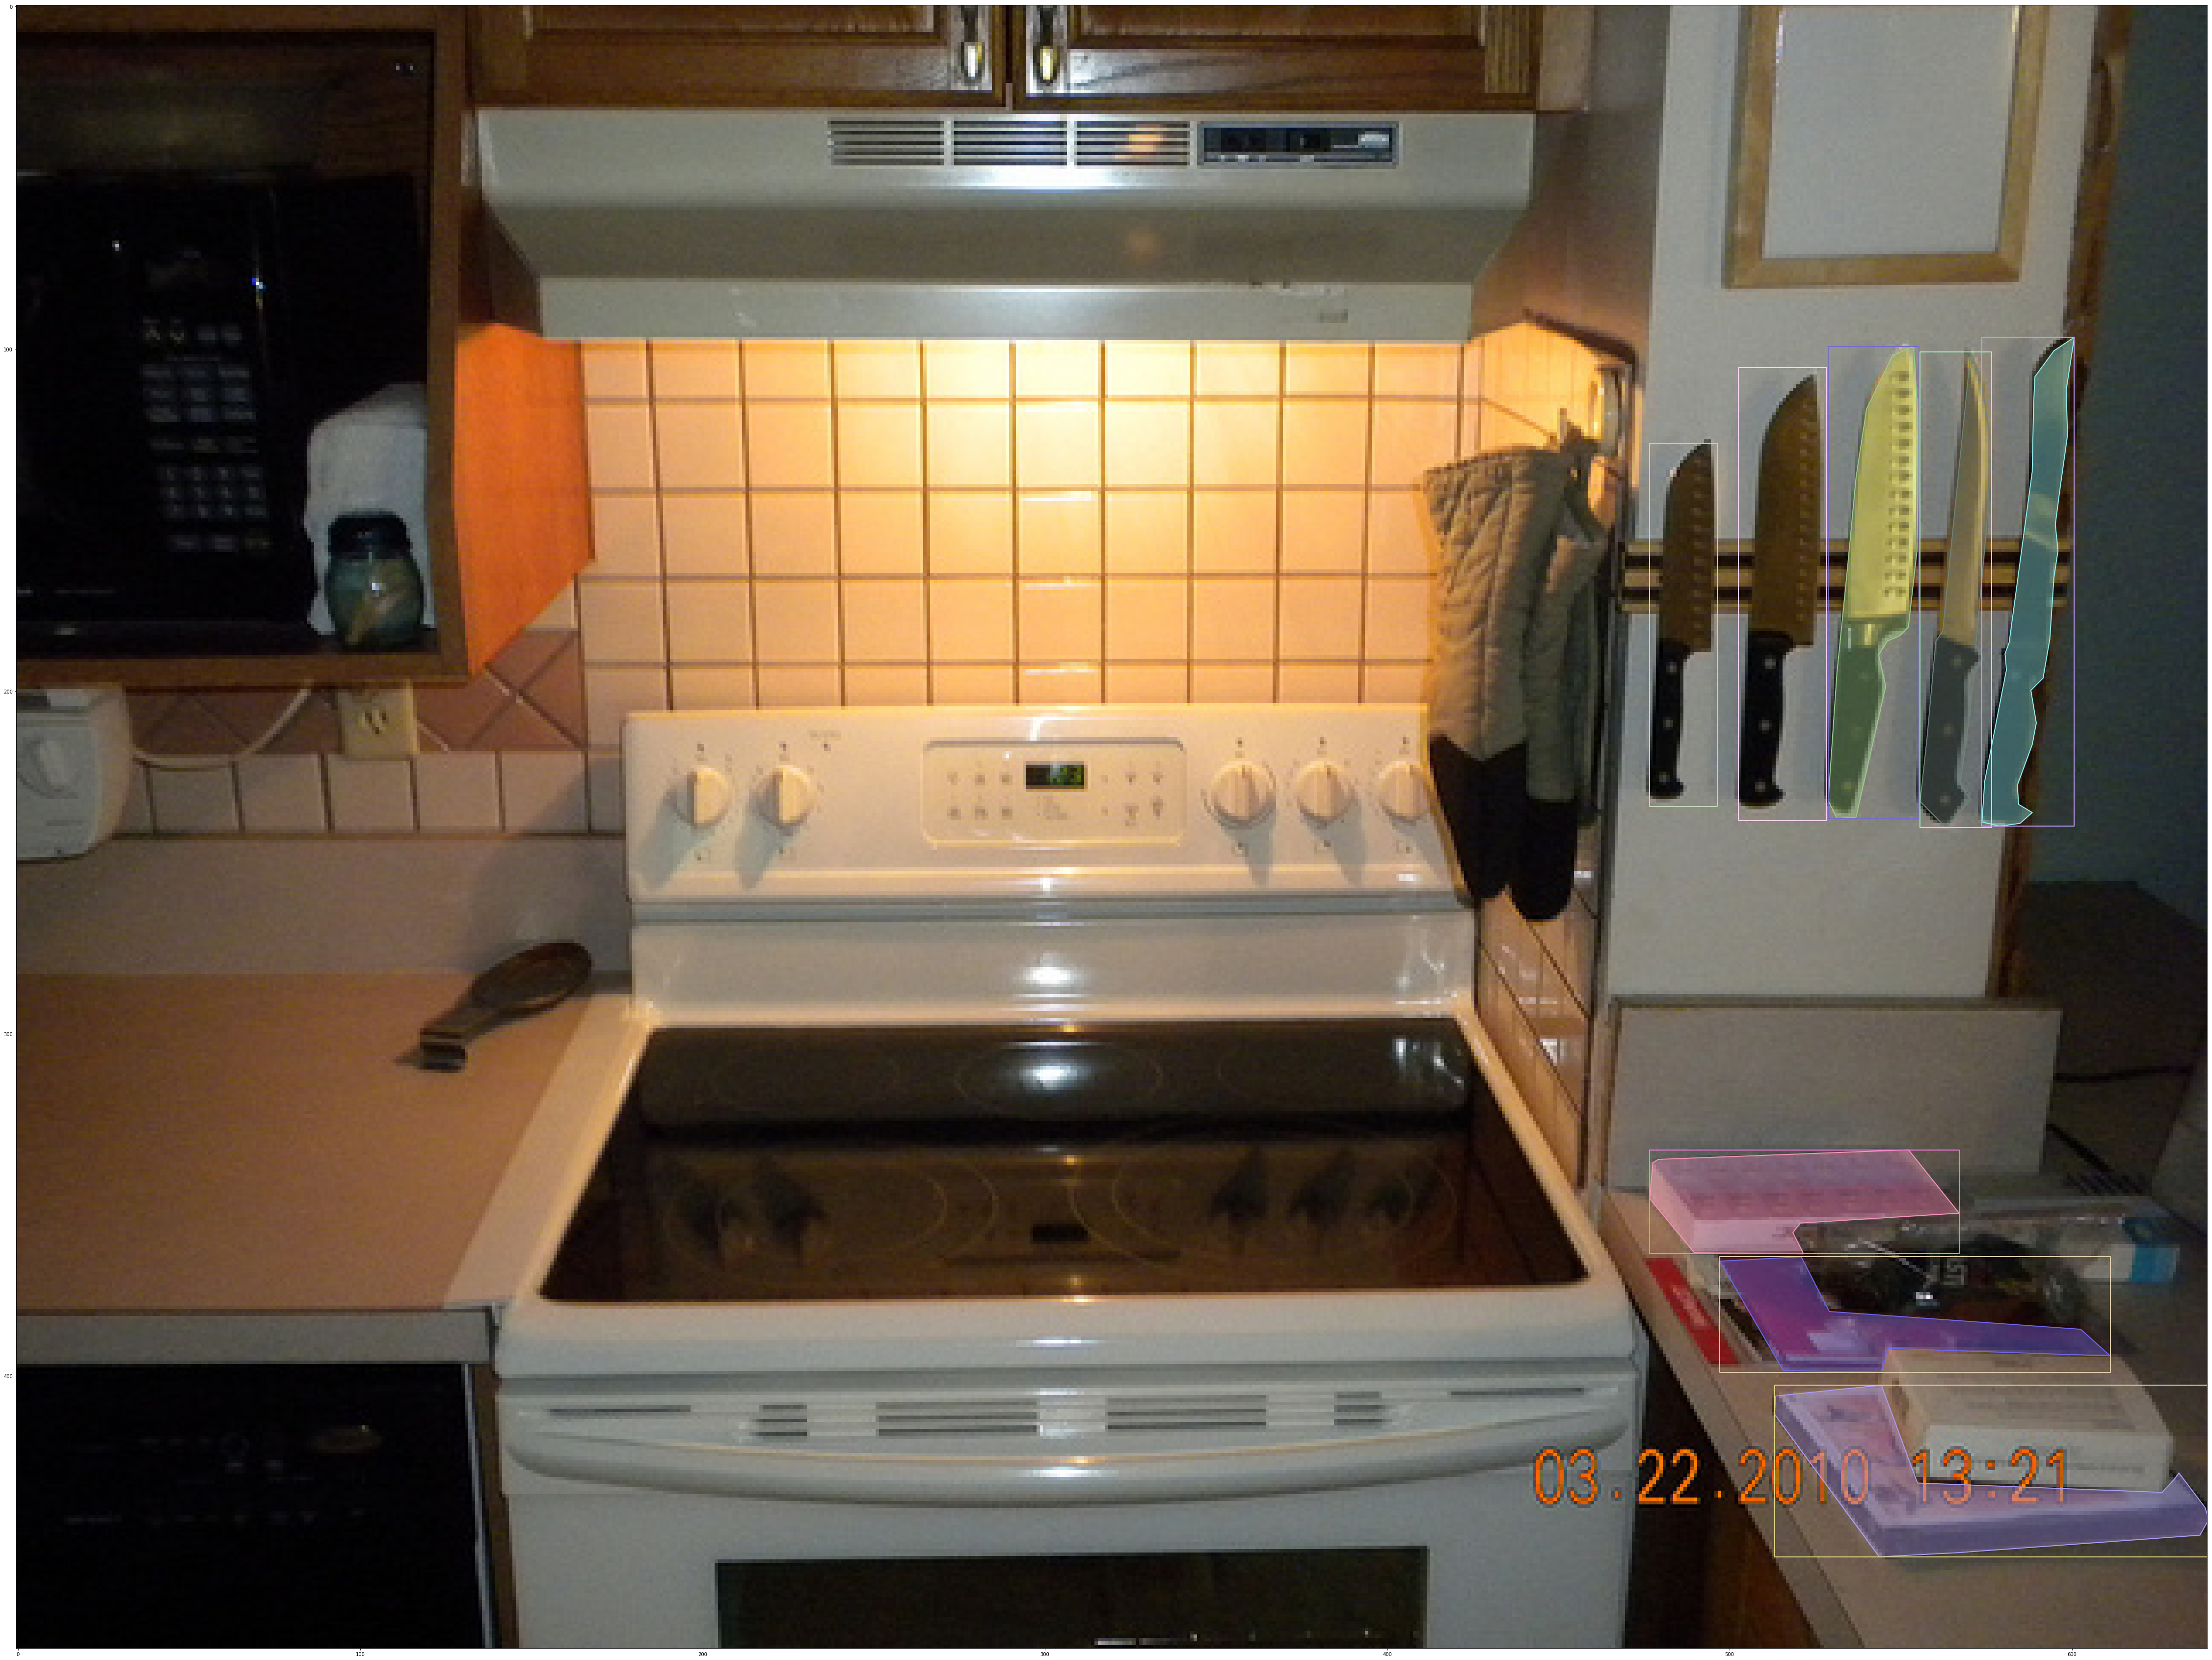

In [10]:
# load and display instance annotations

image = io.imread(imgPath)
plt.imshow(image); plt.axis('on')
pylab.rcParams['figure.figsize'] = (80.0, 100.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data[0]['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
#example_coco.showAnns(annotations)
example_coco.myshowAnns(annotations)